<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#FASTQ-format" data-toc-modified-id="FASTQ-format-0.1">FASTQ format</a></span></li><li><span><a href="#Quality-check-before-mapping" data-toc-modified-id="Quality-check-before-mapping-0.2">Quality check before mapping</a></span><ul class="toc-item"><li><span><a href="#Check-restriction-enzyme-used" data-toc-modified-id="Check-restriction-enzyme-used-0.2.1">Check restriction-enzyme used</a></span></li><li><span><a href="#Plot-PHRED-score-and-ligation/digestion-sites" data-toc-modified-id="Plot-PHRED-score-and-ligation/digestion-sites-0.2.2">Plot PHRED score and ligation/digestion sites</a></span></li></ul></li></ul></li></ul></div>

## FASTQ format

The file is organized in 4 lines per read:
 1 - The header of the DNA sequence with the read id (the read length is optional)
 2 - The DNA sequence
 3 - The header of the sequence quality (this line could be either a repetition of line 1 or empty)
 4 - The sequence quality (it is not human readble, but is provided as PHRED score. Check   https://en.wikipedia.org/wiki/Phred_quality_score for more details)

In [1]:
%%bash 

dsrc d -s FASTQs/mouse_B_rep1_1.fastq.dsrc | head -n 4

@SRR5344921.1
ACCACTGATGGCACCACTGTTGTACTTTAGGATCGATCACTCCTTATACGCACATAGGAAACACTGACTAGAGGG
+
@B@B@>1>=;1@EG0B0;1=E1:>>1111<?=1E9=0><C:<>11=11?1=ECDC1>1=@FD1<:1?C#######


Count the number of lines in the file (4 times the number of reads)

In [2]:
! dsrc d -s FASTQs/mouse_B_rep1_1.fastq.dsrc | wc -l

40000000


There are 40 M lines in the file, which means 10M reads in total.

## Quality check before mapping

### Check restriction-enzyme used

In [3]:
from pytadbit.mapping.restriction_enzymes import identify_re

In [4]:
for cell in ['B', 'PSC']:
    for repl in ['rep1', 'rep2']:
        for side in ['1', '2']:
            pat, enz, pv = identify_re('FASTQs/mouse_{0}_{1}_{2}.fastq.dsrc'.format(cell, repl, side))
            print '- %3s %s %s, probable pattern: %s, matching enzymes: %s' % (
                cell, repl, side, pat, ','.join(enz))

-   B rep1 1, probable pattern: GATC, matching enzymes: BssMI,DpnII,Sau3AI,MboI,Kzo9I,Bsp143I,NdeII,BstMBI,BfuCI
-   B rep1 2, probable pattern: GATC, matching enzymes: BssMI,DpnII,Sau3AI,MboI,Kzo9I,Bsp143I,NdeII,BstMBI,BfuCI
-   B rep2 1, probable pattern: GATC, matching enzymes: BssMI,DpnII,Sau3AI,MboI,Kzo9I,Bsp143I,NdeII,BstMBI,BfuCI
-   B rep2 2, probable pattern: GATC, matching enzymes: BssMI,DpnII,Sau3AI,MboI,Kzo9I,Bsp143I,NdeII,BstMBI,BfuCI
- PSC rep1 1, probable pattern: GATC, matching enzymes: BssMI,DpnII,Sau3AI,MboI,Kzo9I,Bsp143I,NdeII,BstMBI,BfuCI
- PSC rep1 2, probable pattern: GATC, matching enzymes: BssMI,DpnII,Sau3AI,MboI,Kzo9I,Bsp143I,NdeII,BstMBI,BfuCI
- PSC rep2 1, probable pattern: GATC, matching enzymes: BssMI,DpnII,Sau3AI,MboI,Kzo9I,Bsp143I,NdeII,BstMBI,BfuCI
- PSC rep2 2, probable pattern: GATC, matching enzymes: BssMI,DpnII,Sau3AI,MboI,Kzo9I,Bsp143I,NdeII,BstMBI,BfuCI


### Plot PHRED score and ligation/digestion sites

In [5]:
from pytadbit.utils.fastq_utils import quality_plot

In [6]:
r_enz = 'MboI'

/home/dcastillo/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


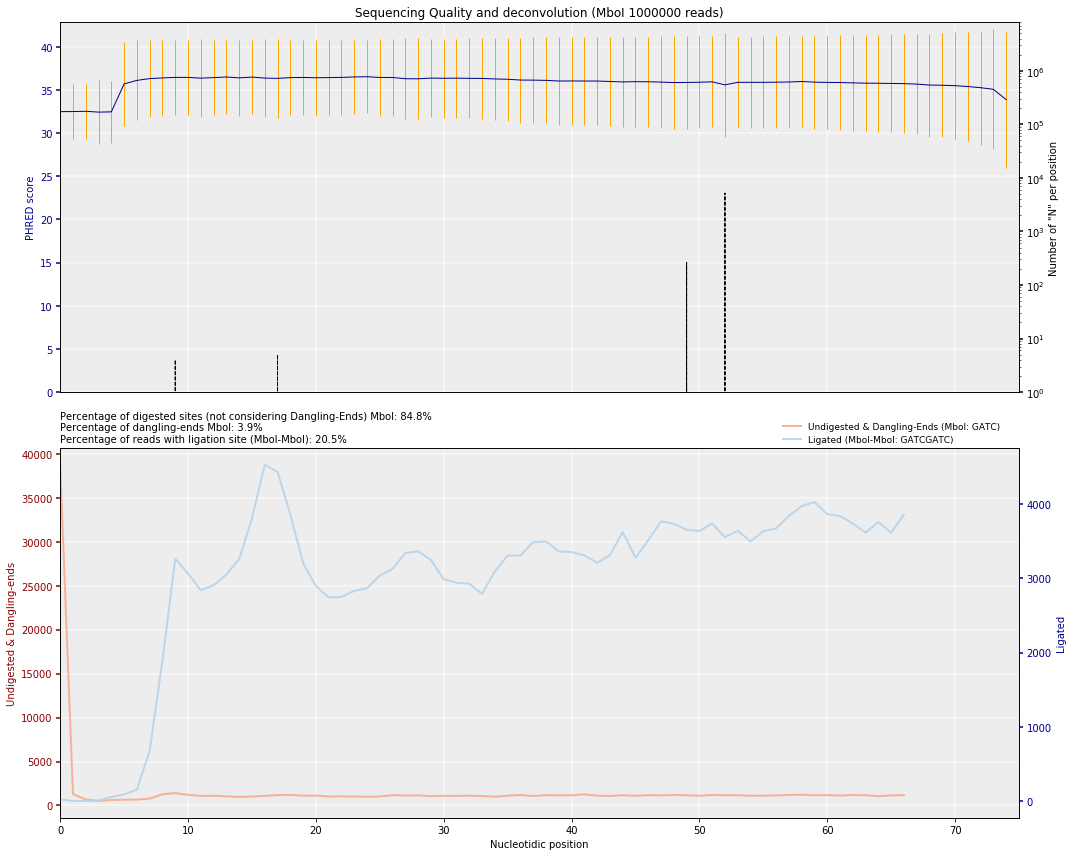

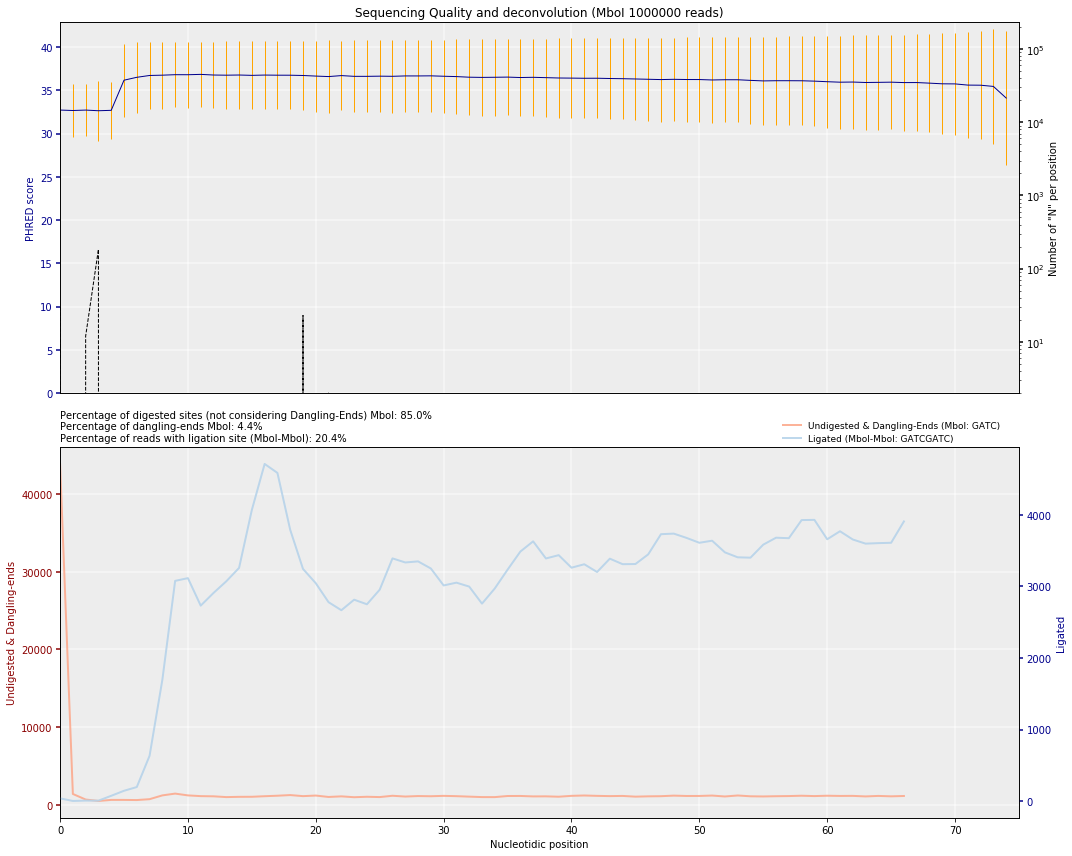

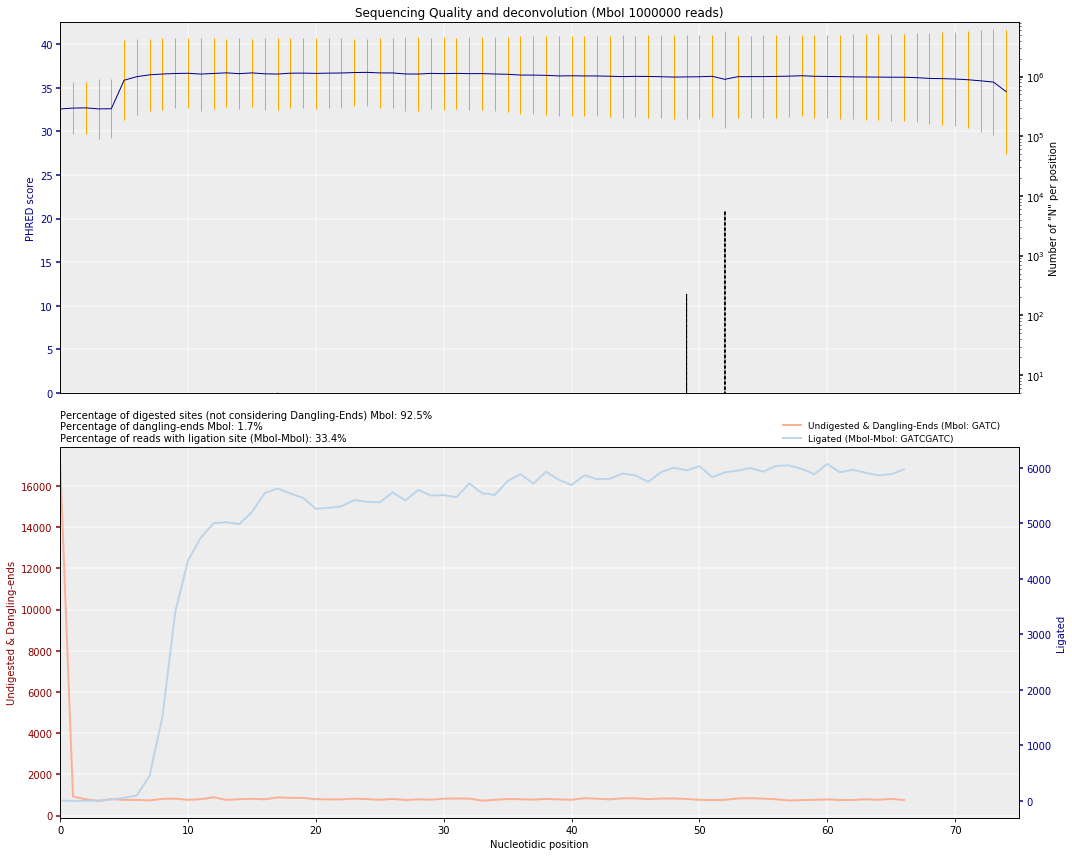

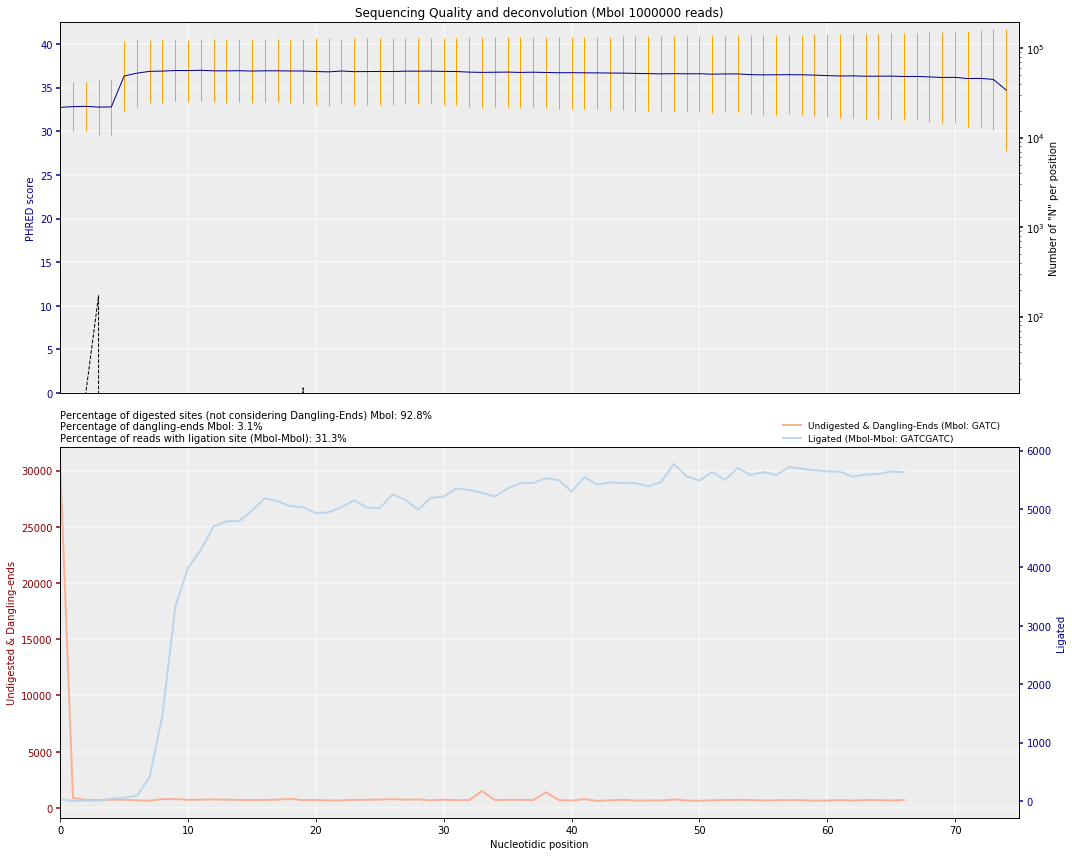

In [7]:
for cell in ['B', 'PSC']:
    for repl in ['rep1', 'rep2']:
        quality_plot('FASTQs/mouse_{0}_{1}_1.fastq.dsrc'.format(cell, repl), r_enz=r_enz, 
                     nreads=1000000, paired=False)

These plots provide a quick overview on the quality of the genome sequencing, as well as a rough estimate of the __efficiency of the digestion and ligation__ steps of the Hi-C experiment.